## SMOTE
Based on SMOTE : Synthetic Minority Over-sampling Technique by Nitesh V. Chawla et. al. https://arxiv.org/abs/1106.1813

Let $T$ be the number of minority class, $N$ be the % number of over-sampled data and $k$ be the number of nearest neighbour

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data depicted as below, row is the number of instance and column is the number of attribute

In [2]:
T = np.random.randint(0, 100, size=(10,2))

for i, j in enumerate(T):
    print("instance in index of-{} : {}".format(i, T[i, :]))

instance in index of-0 : [27  7]
instance in index of-1 : [59 59]
instance in index of-2 : [84 27]
instance in index of-3 : [56 26]
instance in index of-4 : [77 50]
instance in index of-5 : [23  1]
instance in index of-6 : [70 43]
instance in index of-7 : [26 62]
instance in index of-8 : [26 13]
instance in index of-9 : [28 53]


We want to increase/over-sampling our data by 200% or 2 times, thus $N$ = 2

In [3]:
N = 2

First step, find the $k$-nearest neighbour for each instances in $T$. Set the default value for $k=3$. I only use euclidean equation to find distance among instaces. 
Afterward, the indices of all $k$-nearest neighbour will stored in array.

In [4]:
k = 3

In [5]:
# distance function between two points
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=0))

# function find the indices of k-nearest neighbour for one instance
def kNN(instance, data, k=3):    
    
    # number of instance in data
    n = data.shape[0]
    # variable for storing result
    temp = np.zeros(n)
    # calculate distance on instance and data
    for i in range(n):
        temp[i] = euclidian_distance(instance, data[i, :])
    
    # sort the distance and return the indices of the k-nearest neighbour
    return np.argsort(temp)[:k] 

In [6]:
# function to find the instance based on the indices which returned from kNN()
def populateNArray(data, k=3):
    
    # number of instance
    n = data.shape[0]
    # variable for storing result. row is the number of data, columns is the number of k-nearest neighbour
    temp = np.zeros(shape=(n, k))
    # find all the k-nearest neighbour in data
    for i in range(n):
        temp[i, :] = np.array(kNN(data[i, :], data, k))
        
    # return the indices of the k-nearest neighbour in all data
    return temp.astype(int)

Find the $k$-nearest neighbour for every instance in $T$

In [7]:
n_neighbours = populateNArray(T)

for i, j in enumerate(n_neighbours):
    print("{}-nearest neighbours of instance in index of-{} are :{}".format(k, i, n_neighbours[i, :]))

3-nearest neighbours of instance in index of-0 are :[0 8 5]
3-nearest neighbours of instance in index of-1 are :[1 6 4]
3-nearest neighbours of instance in index of-2 are :[2 6 4]
3-nearest neighbours of instance in index of-3 are :[3 6 2]
3-nearest neighbours of instance in index of-4 are :[4 6 1]
3-nearest neighbours of instance in index of-5 are :[5 0 8]
3-nearest neighbours of instance in index of-6 are :[6 4 1]
3-nearest neighbours of instance in index of-7 are :[7 9 1]
3-nearest neighbours of instance in index of-8 are :[8 0 5]
3-nearest neighbours of instance in index of-9 are :[9 7 1]


Based on the indices of $k$-nearest neighbour and let $t_i$ be the $i$-th instance of $T$, we calculate the synthetic data of $T$ as follows :

$$
((t_i \, attribute - nearestNeighbour \, attribute) * random(0, 1)) + t_i \, attribute
$$

In [8]:
def SMOTE(data, N, k=3):
    
    # find the shape of data
    n, m = data.shape
    # create zero array for storing synthetic data
    # the number of instance in synthetic data is defined n*N
    temp = np.zeros(shape=(n*N, m))
    # find the indices of the k-nearest neighbour in all data
    nnArray = populateNArray(data, k)
    
    # increment variable
    l = 0
    # loop in all data
    for i in range(n):
        # loop the number of times synthetic instance will be created
        for j in range(N):
            # calculate new synthetic instance
            temp[l, :] = data[i, :] + ((data[nnArray[i,N], :] - data[i, :]) * np.random.uniform(0, 1))
            l += 1      
            
    # return smoted data
    return temp

In [9]:
x_smoted = SMOTE(T, N)
x_smoted

array([[23.53919782,  1.80879673],
       [24.06881433,  2.6032215 ],
       [75.93445238, 50.53277381],
       [75.19864142, 50.90067929],
       [79.25940503, 42.57624062],
       [79.41090674, 42.07844928],
       [66.15739345, 26.36276405],
       [59.30405829, 26.11800208],
       [75.23492704, 50.88253648],
       [59.17003801, 58.914981  ],
       [25.71810797, 11.87243188],
       [23.35425555,  2.4170222 ],
       [61.12150469, 55.91417499],
       [67.27935666, 46.9572994 ],
       [46.61414593, 60.12598673],
       [38.1945575 , 60.89140386],
       [24.86771606,  8.47086425],
       [24.49129275,  6.965171  ],
       [44.33632575, 56.1618695 ],
       [37.3437004 , 54.80845814]])

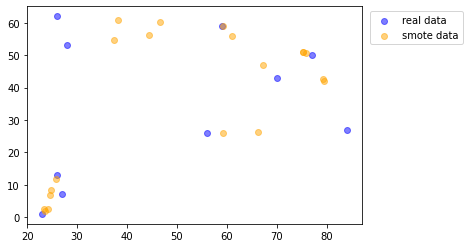

In [10]:
plt.scatter(T[:,0], T[:,1], color='blue', label="real data", alpha=0.5)
plt.scatter(x_smoted[:,0], x_smoted[:,1], color='orange', label="smote data", alpha=0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

note :
- this implementation not covered for N < 100%
